# Wine Descriptions Analysis
## Data Cleaning
### Created by: Elliot Pack 
#### November 2019

In [318]:
# Import packages to analyze text
import nltk 
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [319]:
# Open data and limit columns to Variety, Description
import pandas as pd
import numpy as np

df = pd.read_csv("wine_data.csv")
df = df[['variety','description']]

In [320]:
# Condense DataFrame by variety
df = df.groupby(['variety'])['description'].apply(' '.join).reset_index()

In [321]:
# Data cleaning to make text lowercase, remove punctuation, etc. 

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', ' ', text) 
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('–', ' ', text)
    text = re.sub('—', ' ', text) 
    return text

round1 = lambda x: clean_text_round1(x)
df.description = df.description.apply(round1)

In [322]:
# Pull in list of stop words

stop_words = stopwords.words('english')

# Manually add some words that will not be meaningful in differentiating wines 


remove_words = pd.read_csv("remove_words.csv")
remove_words = remove_words['remove_words'].values
for words in remove_words:
    stop_words.append(words)

# Second round of data cleaning to remove stop words and perform stemming
stemming = PorterStemmer()

def clean_text_round_2(row):
    description = row['description']
    tokens = nltk.word_tokenize(description)
    token_words = [w for w in tokens if w.isalpha()]
    stemmed_words = [stemming.stem(w) for w in token_words]
    meaningful_words = [w for w in token_words if not w in stop_words]
    #joined_words = (" ".join(meaningful_words))
    return meaningful_words

df['meaningful_words'] = df.apply(clean_text_round_2, axis=1)

In [326]:
# Create a column with the most commonly used words 

def max_freq(row):
    text = row['meaningful_words']
    fdist = FreqDist(text)
    freq = fdist.most_common(5)
    return freq

df['common_descriptors'] = df.apply(max_freq, axis=1)

In [327]:
df

variety                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [328]:
# Create simplified table for later use

wine_descriptors = df[['variety','common_descriptors']]

In [329]:
wine_descriptors

,variety,common_descriptors
0,Anderson Valley,"[(apple, 4), (ripe, 2), (lively, 2), (pear, 2), (seem, 2)]"
1,Bordeaux Blanc,"[(herbal, 2), (crispness, 2), (tight, 2), (acidity, 2), (zesty, 2)]"
2,Bâtard-Montrachet,"[(blend, 2), (four, 2), (parcels, 2), (famed, 2), (cru, 2)]"
3,Cabernet Sauvignon,"[(tannins, 20), (palate, 18), (black, 18), (blackberry, 14), (virginie, 14)]"
4,Cadillac Côtes de Bordeaux,"[(spicy, 2), (smoky, 2), (moves, 2), (bright, 2), (berry, 2)]"
5,California,"[(minerallaced, 2), (flint, 2), (gravel, 2), (slate, 2), (play, 2)]"
6,Chardonnay,"[(lemon, 24), (palate, 16), (acidity, 14), (drink, 14), (matt, 12)]"
7,Clarksburg,"[(fruity, 2), (tastes, 2), (ripe, 2), (pure, 2), (like, 2)]"
8,Columbia Valley (WA),"[(cabernet, 4), (sean, 4), (p, 4), (sullivan, 4), (varietal, 2)]"
9,Corton-Charlemagne,"[(acidity, 4), (roger, 4), (voss, 4), (power, 2), (wonderful, 2)]"


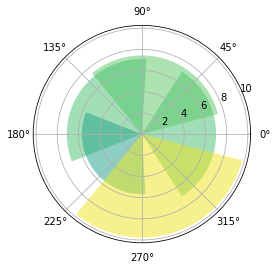

In [336]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 5
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = 2
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()